In [117]:
# For reading data sets from the web.
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import keras
# Need this for LabelEncoder
from sklearn import preprocessing

In [118]:
student_data = np.array(pandas.read_table("./student-por.csv",
delimiter=";", header=0))



In [119]:
np.random.shuffle(student_data)
student_data

array([['GP', 'F', 16, ..., 15, 13, 14],
       ['GP', 'M', 17, ..., 11, 11, 14],
       ['GP', 'F', 16, ..., 10, 11, 12],
       ...,
       ['GP', 'M', 15, ..., 14, 13, 14],
       ['GP', 'M', 17, ..., 12, 15, 15],
       ['GP', 'F', 18, ..., 12, 13, 14]], dtype=object)

In [120]:
scores = student_data[:,32]
scores


array([14, 14, 12, 13, 10, 11, 12, 12, 14, 12, 14, 17, 12, 15, 13, 15, 18,
       9, 12, 12, 15, 10, 12, 13, 18, 10, 11, 11, 14, 0, 11, 12, 18, 14,
       10, 10, 9, 11, 11, 13, 10, 12, 16, 13, 17, 8, 8, 12, 16, 14, 9, 9,
       9, 16, 10, 8, 11, 11, 10, 9, 0, 11, 16, 11, 15, 17, 15, 13, 9, 13,
       14, 11, 10, 8, 10, 14, 11, 11, 12, 8, 10, 13, 11, 13, 15, 12, 8, 8,
       13, 13, 15, 11, 13, 12, 11, 10, 12, 11, 15, 12, 9, 11, 10, 10, 13,
       11, 8, 11, 13, 18, 12, 17, 17, 12, 8, 13, 12, 16, 12, 17, 8, 0, 17,
       12, 13, 14, 11, 14, 16, 9, 13, 13, 11, 9, 12, 12, 17, 10, 7, 12,
       10, 10, 16, 11, 12, 10, 11, 15, 15, 10, 10, 10, 16, 11, 17, 15, 15,
       14, 12, 10, 10, 11, 15, 10, 14, 10, 7, 18, 14, 13, 12, 11, 11, 15,
       13, 11, 14, 10, 11, 15, 18, 0, 18, 11, 0, 13, 9, 13, 10, 11, 10, 8,
       9, 15, 10, 9, 5, 17, 11, 13, 18, 13, 14, 13, 10, 11, 15, 11, 13,
       12, 13, 12, 9, 10, 10, 10, 10, 15, 17, 7, 9, 9, 13, 10, 10, 11, 13,
       9, 10, 18, 10, 7, 16, 12, 12, 

In [121]:
student_data[0,:]

array(['GP', 'F', 16, 'U', 'GT3', 'A', 3, 4, 'services', 'other',
       'course', 'father', 1, 1, 0, 'no', 'no', 'no', 'no', 'yes', 'yes',
       'yes', 'no', 3, 2, 1, 1, 4, 5, 12, 15, 13, 14], dtype=object)

In [122]:
for i in range(len(scores)):
    if(scores[i] > 18):
        scores[i] = 4
    elif(scores[i] > 16):
        scores[i] = 3
    elif(scores[i] > 14):
        scores[i] = 2
    elif(scores[i] > 12):
        scores[i] = 1
    else:
        scores[i] = 0


In [123]:
for i in range(len(scores)):
    student_data[i,32] = scores[i]
    
student_data

array([['GP', 'F', 16, ..., 15, 13, 1],
       ['GP', 'M', 17, ..., 11, 11, 1],
       ['GP', 'F', 16, ..., 10, 11, 0],
       ...,
       ['GP', 'M', 15, ..., 14, 13, 1],
       ['GP', 'M', 17, ..., 12, 15, 2],
       ['GP', 'F', 18, ..., 12, 13, 1]], dtype=object)

In [124]:
student_data.shape

In [125]:
le = preprocessing.LabelEncoder()

# Encoding non-numeric data to integers

In [126]:
# School (binomial)
le.fit(student_data[:,0])
student_data[:,0] = le.transform(student_data[:,0])

In [127]:
# Sex (binomial)
le.fit(student_data[:,1])
student_data[:,1] = le.transform(student_data[:,1])

In [128]:
# address (binomial)
le.fit(student_data[:,3])
student_data[:,3] = le.transform(student_data[:,3])

In [129]:
# Famsize (binomial)
le.fit(student_data[:,4])
student_data[:,4] = le.transform(student_data[:,4])

In [130]:
# Pstatus (binomial)
le.fit(student_data[:,5])
student_data[:,5] = le.transform(student_data[:,5])

In [131]:
# Mjob (nominal)
le.fit(student_data[:,8])
student_data[:,8] = le.transform(student_data[:,8])

In [132]:
# Fjob (nominal)
le.fit(student_data[:,9])
student_data[:,9] = le.transform(student_data[:,9])

In [133]:
# Reason (nominal)
le.fit(student_data[:,10])
student_data[:,10] = le.transform(student_data[:,10])

In [134]:
# Guardian (nominal)
le.fit(student_data[:,11])
student_data[:,11] = le.transform(student_data[:,11])

In [135]:
# schoolsup (binomial)
le.fit(student_data[:,15])
student_data[:,15] = le.transform(student_data[:,15])

In [136]:
# famsup (binomial)
le.fit(student_data[:,16])
student_data[:,16] = le.transform(student_data[:,16])

In [137]:
# paid (binomial)
le.fit(student_data[:,17])
student_data[:,17] = le.transform(student_data[:,17])

In [138]:
# activities (binomial)
le.fit(student_data[:,18])
student_data[:,18] = le.transform(student_data[:,18])

In [139]:
# nursery (binomial)
le.fit(student_data[:,19])
student_data[:,19] = le.transform(student_data[:,19])

In [140]:
# higher (binomial)
le.fit(student_data[:,20])
student_data[:,20] = le.transform(student_data[:,20])

In [141]:
# internet (binomial)
le.fit(student_data[:,21])
student_data[:,21] = le.transform(student_data[:,21])

In [142]:
# romantic (binomial)
le.fit(student_data[:,22])
student_data[:,22] = le.transform(student_data[:,22])

In [143]:
student_data

array([[0, 0, 16, ..., 15, 13, 1],
       [0, 1, 17, ..., 11, 11, 1],
       [0, 0, 16, ..., 10, 11, 0],
       ...,
       [0, 1, 15, ..., 14, 13, 1],
       [0, 1, 17, ..., 12, 15, 2],
       [0, 0, 18, ..., 12, 13, 1]], dtype=object)

# Encoding 0's to -1 for binomial data.

### Surely there's a one line method to do this... right, Keras?

In [144]:
school = student_data[:,0]
school = np.where(school==0, -1, school)
student_data[:,0] = school

In [145]:
sex = student_data[:,1]
sex = np.where(sex==0, -1, sex)
student_data[:,1] = sex

In [146]:
address = student_data[:,3]
address = np.where(address==0, -1, address)
student_data[:,3] = address

In [147]:
famsize = student_data[:,4]
famsize = np.where(famsize==0, -1, famsize)
student_data[:,4] = famsize

In [148]:
Pstatus = student_data[:,5]
Pstatus = np.where(Pstatus==0, -1, Pstatus)
student_data[:,5] = Pstatus

In [149]:
schoolsup = student_data[:,15]
schoolsup = np.where(schoolsup==0, -1, schoolsup)
student_data[:,15] = schoolsup

In [150]:
famsup = student_data[:,16]
famsup = np.where(famsup==0, -1, famsup)
student_data[:,16] = famsup

In [151]:
paid = student_data[:,17]
paid = np.where(paid==0, -1, paid)
student_data[:,17] = paid

In [152]:
activities = student_data[:,18]
activities = np.where(activities==0, -1, activities)
student_data[:,18] = activities

In [153]:
nursery = student_data[:,19]
nursery = np.where(nursery==0, -1, nursery)
student_data[:,19] = nursery

In [154]:
higher = student_data[:,20]
higher = np.where(higher==0, -1, higher)
student_data[:,20] = higher

In [155]:
internet = student_data[:,21]
internet = np.where(internet==0, -1, internet)
student_data[:,21] = internet

In [156]:
romantic = student_data[:,22]
romantic = np.where(romantic==0, -1, romantic)
student_data[:,22] = romantic

# Standardizing the nominal and numerical data.

In [157]:
scaler = preprocessing.StandardScaler()

### I don't think this warning is THAT concerning

In [158]:
temp = student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]]
Standardized = scaler.fit_transform(temp)

/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Not sure about the -0.0 for the mean...

In [159]:
print('Mean:', round(Standardized.mean()))
print('Standard deviation:', Standardized.std())

Mean: -0.0
Standard deviation: 0.9999999999999999


In [160]:
student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]] = Standardized

In [161]:
x = student_data[:,0:32]

In [162]:
x[0,0:]

array([-1, -1, -0.6114217963383591, 1, -1, -1, 0.4281306268612493,
       1.5407154371084224, 0.8486372158634918, -0.2607275884816344,
       -0.9339740507872134, -1.5949259932605189, -0.7600319244561619,
       -1.122808480157685, -0.3743051181921297, -1, -1, -1, -1, 1, 1, 1,
       -1, -0.9745358622571536, -1.1237713349052476, -1.8597109150959,
       -0.5435553304269218, 1.339864308623573, 1.0129025496993858,
       1.7986190052059936, 1.3126972261774088, 0.4911367513733601],
      dtype=object)

In [163]:
results = student_data[:,32] # output vector

### Convert results to one-hot encoding
#### the actual output vector doesn't include at least one example of each possible grade so I made a vector of all possibilities for to_categorical

In [164]:
possible_results = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
possible_results_2 = [0,1,2,3,4]

In [165]:
#y = keras.utils.to_categorical(results, len(possible_results))
y = keras.utils.to_categorical(results,len(possible_results_2))

# Data is now preprocessed

### Note: columns 31 and 32 are not used. I do not believe they are useful for our net.

In [446]:
model = keras.Sequential()

In [447]:
input_size = x.shape[1]
output_size = y.shape[1]

In [448]:
# create the hidden layer
model.add(keras.layers.Dense(800,input_dim=input_size,activation='relu'))

In [449]:
model.add(keras.layers.Dense(400,activation='relu'))

In [450]:
# output layer
model.add(keras.layers.Dense(output_size,activation='softmax'))

In [451]:
# compile
model.compile(loss='categorical_crossentropy',optimizer='adamax', metrics=['accuracy'])

In [452]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 800)               26400     
_________________________________________________________________
dense_77 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_78 (Dense)             (None, 5)                 2005      
Total params: 348,805
Trainable params: 348,805
Non-trainable params: 0
_________________________________________________________________


# Model Training
## This is some results from training the model
## Loss seems to be going down slowly
## Interestingly val_loss seems to be increasing 
## I have ploted the loss below
## I could not plot accuracy which is weird and I will have to look into what is causing that
# Austin

In [453]:
x_train = x[0:518,:]
x_test = x[519:649,:]

y_train = y[0:518,:]
y_test = y[519:649,:]

In [ ]:
history = model.fit(x_train,y_train,batch_size = 32, epochs = 7, verbose = 0, validation_split = 0.2)

In [ ]:
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

In [72]:
## PCAs of Data

In [73]:
#def func(X):
 #   return X
#xFunc = np.apply_along_axis(func,0,x)


#U,S,V = np.linalg.svd(xFunc,full_matrices=True)

# Plot the percent of variance accounted for by each feature
#plt.plot(100.0*S/np.sum(S))
#plt.ylabel("Percent Variance")
#plt.xlabel("Singular Value")
#plt.show()

In [74]:
pca=PCA()
pca.fit(x)
pca_data = pca.transform(x)

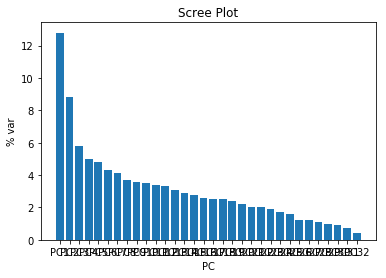

In [75]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC' + str(i) for i in range (1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("% var")
plt.xlabel("PC")
plt.title("Scree Plot")
plt.show()